<a href="https://colab.research.google.com/github/evelynn-rhodes/Kira_Lab_AllenSDK001/blob/main/AllenSDK_DataAnalysis001_SingleCellAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing the Allen SDK

In [ ]:
# 1. Install a modern NumPy that works with Python 3.12
!pip install "numpy>=1.26,<2.0"

# 2. Install AllenSDK without trying to downgrade NumPy
!pip install allensdk --no-deps

# 3. Manually install its dependencies
!pip install psycopg2-binary hdmf h5py matplotlib pandas requests scipy scikit-learn tqdm
!pip install argschema boto3 glymur ndx-events pynrrd pynwb scikit-build semver SimpleITK


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 88.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 32.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 336.7/336.7 kB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 753.1/753.1 kB 39.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
allensdk 2.16.2 requires argschema, which is not installed.
allensdk 2.16.2 requires boto3, which is not installed.
allensdk 2.16.2 requires glymur, which is not installed.
allensdk 2.16.2 requires ndx-events, which is not installed.
allensdk 2.16.2 requires pynrrd, which is not installed.
allensdk 2.16.2 requires pynwb, which is not installed.
allensdk 2.16.2 requires scikit-build, which is not installed.
allensdk 2.16.2 req

Imports and Verify that the SDK has been installed correctly

In [ ]:
import allensdk
print("AllenSDK version:", allensdk.__version__)

# Try a common module
from allensdk.core.brain_observatory_cache import BrainObservatoryCache
import allensdk.brain_observatory.stimulus_info as stim_info
import pprint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print("BrainObservatoryCache loaded successfully!")
boc = BrainObservatoryCache(manifest_file='boc/manifest.json')

AllenSDK version: 2.16.2
BrainObservatoryCache loaded successfully!


Getting the single cell data we want to explore and the inputs.

In [ ]:
# --- Inputs  ---
container_id = 	511510917     # replace with your experiment ID
cell_id = 517442396                # set to a specific cell ID or None for first cell
ori_choice = 60.0             # orientation of interest (deg)
sf_choice = 0.08              # spatial frequency
phase_choice = 0.5            # phase

# --- Get all experiments in that container ---
exps = boc.get_ophys_experiments(experiment_container_ids=[container_id])
print(f"Experiments in container {container_id}: {len(exps)}")
pprint.pprint(exps)

# --- Filter for the experiment with static gratings (Session B) ---
static_exp = boc.get_ophys_experiments(
    experiment_container_ids=[container_id],
    stimuli=[stim_info.STATIC_GRATINGS]
)[0]

exp_id = static_exp['id']
print(f"\nUsing Session B experiment with static gratings. Ophys experiment ID: {exp_id}")

# --- Load dataset ---
dataset = boc.get_ophys_experiment_data(exp_id)

Experiments in container 511510917: 3
[{'acquisition_age_days': 86,
  'cre_line': 'Cux2-CreERT2',
  'donor_name': '229107',
  'experiment_container_id': 511510917,
  'fail_eye_tracking': False,
  'id': 506520703,
  'imaging_depth': 175,
  'reporter_line': 'Ai93(TITL-GCaMP6f)',
  'session_type': 'three_session_B',
  'specimen_name': 'Cux2-CreERT2;Camk2a-tTA;Ai93-229107',
  'targeted_structure': 'VISl'},
 {'acquisition_age_days': 85,
  'cre_line': 'Cux2-CreERT2',
  'donor_name': '229107',
  'experiment_container_id': 511510917,
  'fail_eye_tracking': True,
  'id': 506248008,
  'imaging_depth': 175,
  'reporter_line': 'Ai93(TITL-GCaMP6f)',
  'session_type': 'three_session_C',
  'specimen_name': 'Cux2-CreERT2;Camk2a-tTA;Ai93-229107',
  'targeted_structure': 'VISl'},
 {'acquisition_age_days': 87,
  'cre_line': 'Cux2-CreERT2',
  'donor_name': '229107',
  'experiment_container_id': 511510917,
  'fail_eye_tracking': True,
  'id': 506809539,
  'imaging_depth': 175,
  'reporter_line': 'Ai93(TITL

Creating a table to use for analysis

In [ ]:
# -----------------------------
# Load data
# -----------------------------

# Select cell
cell_ids = dataset.get_cell_specimen_ids()
if cell_id is None:
    cell_id = cell_ids[0]

times = dataset.get_fluorescence_timestamps()
_, dff_traces = dataset.get_dff_traces([cell_id])
trace = dff_traces[0]

# Stimulus table for static gratings
stim_table = dataset.get_stimulus_table("static_gratings")

# Filter for your chosen orientation, SF, and phase
subset = stim_table[
    (stim_table["orientation"] == ori_choice) &
    (stim_table["spatial_frequency"] == sf_choice) &
    (stim_table["phase"] == phase_choice)
]

print(f"Found {len(subset)} trials for ori={ori_choice}, sf={sf_choice}, phase={phase_choice}")


Found 49 trials for ori=60.0, sf=0.08, phase=0.5


First, plot trial by trial for one specific stimulus (one specific phase, orientation, and phase)

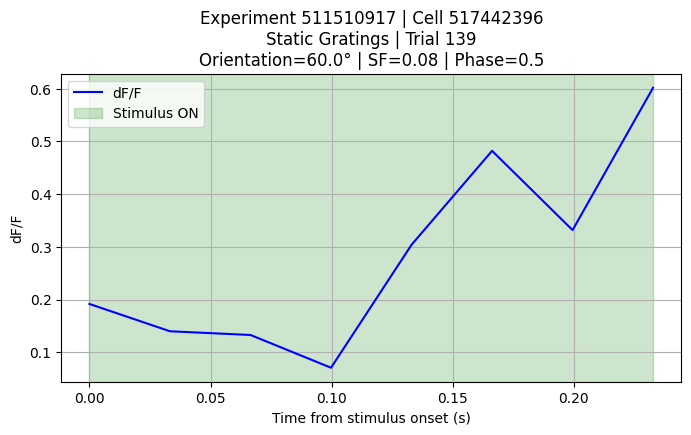

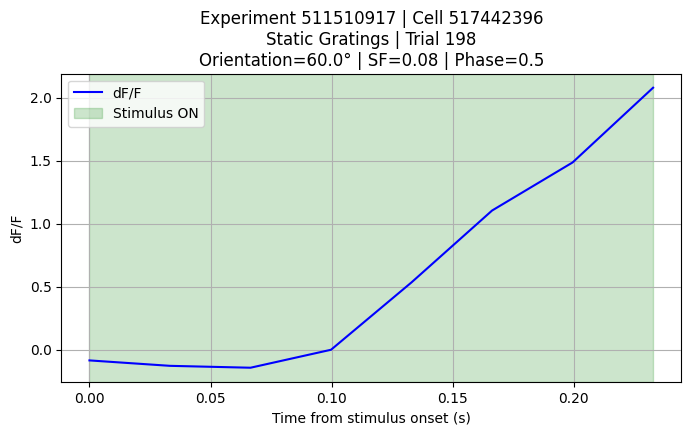

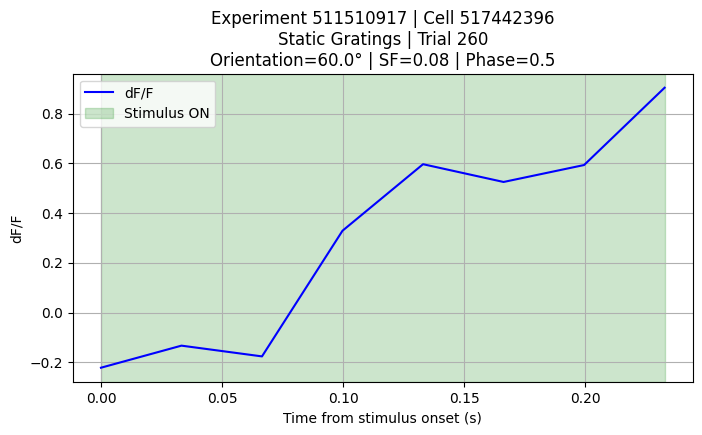

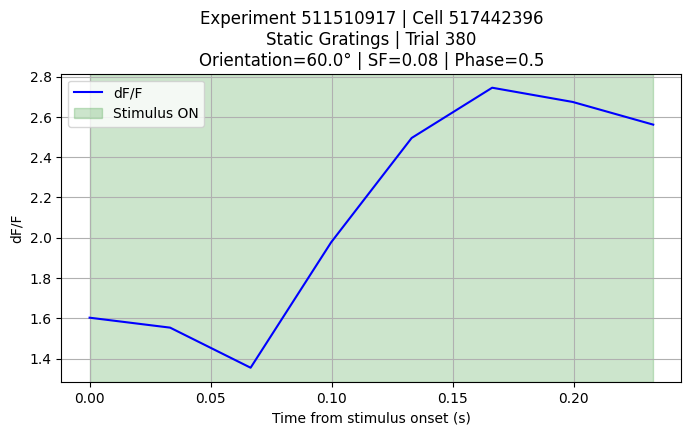

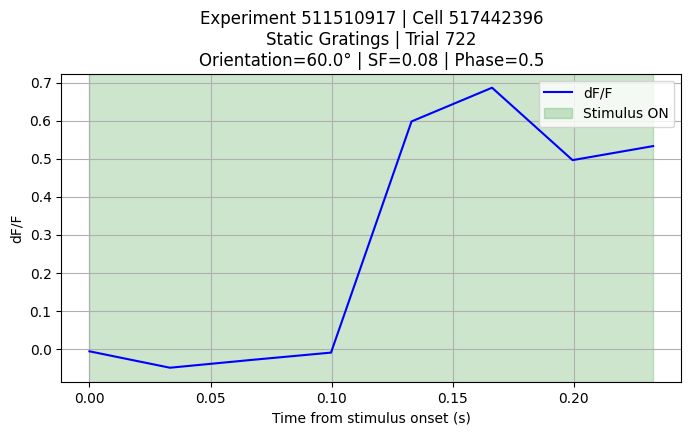

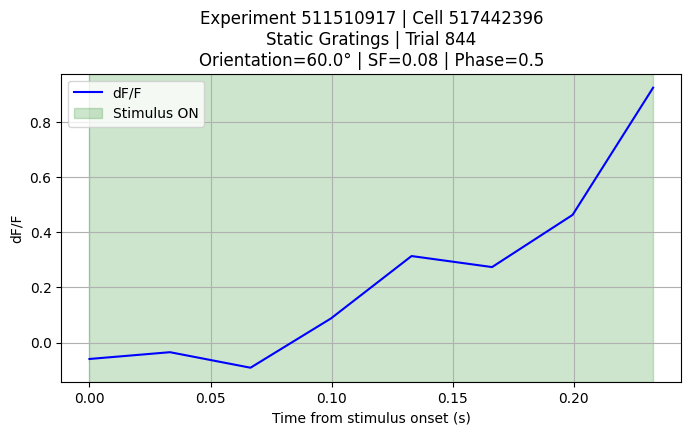

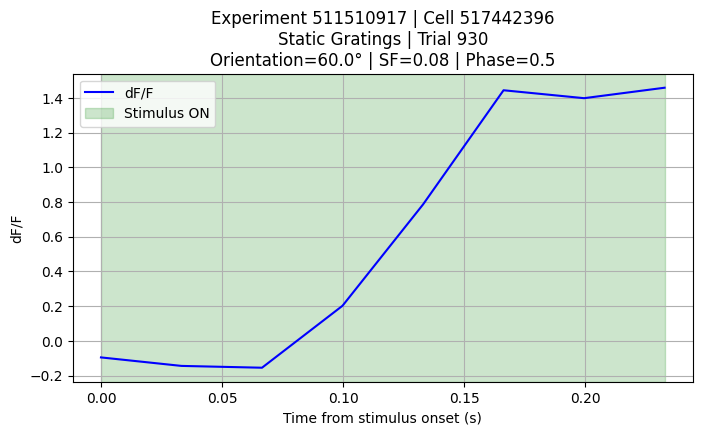

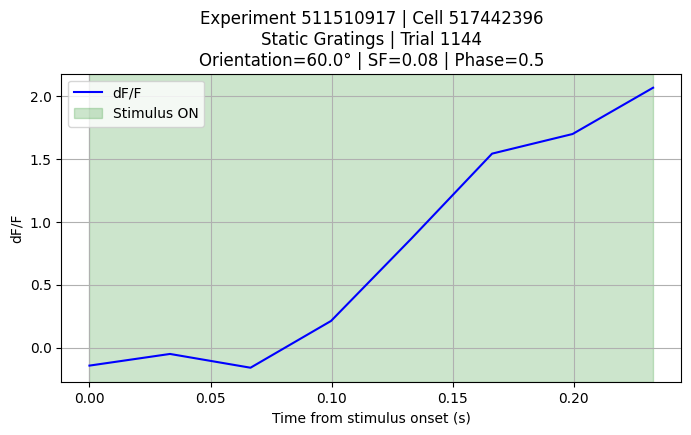

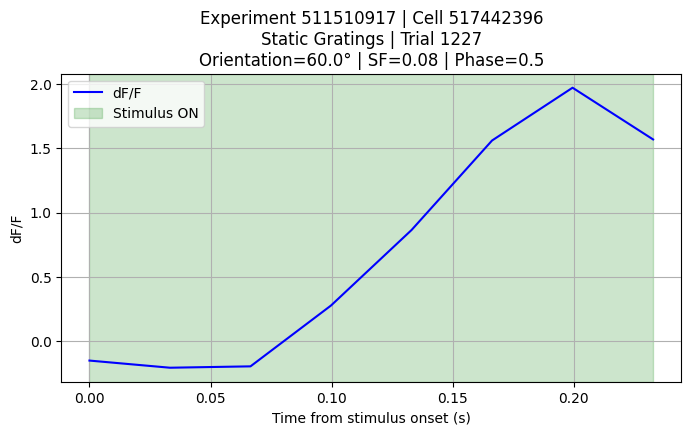

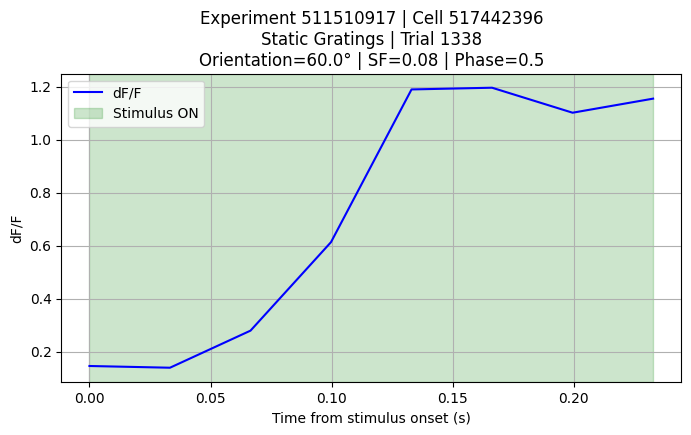

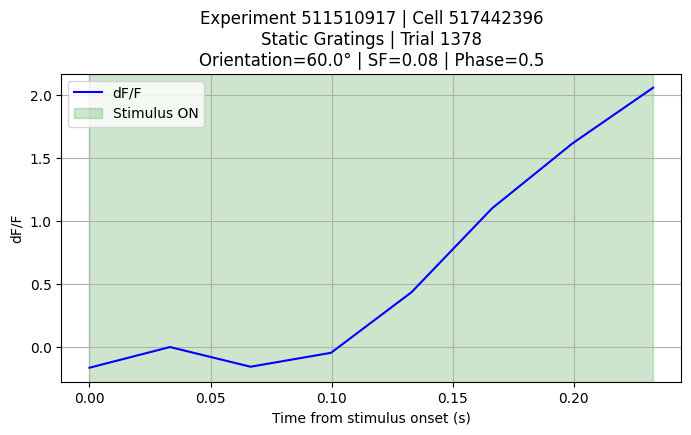

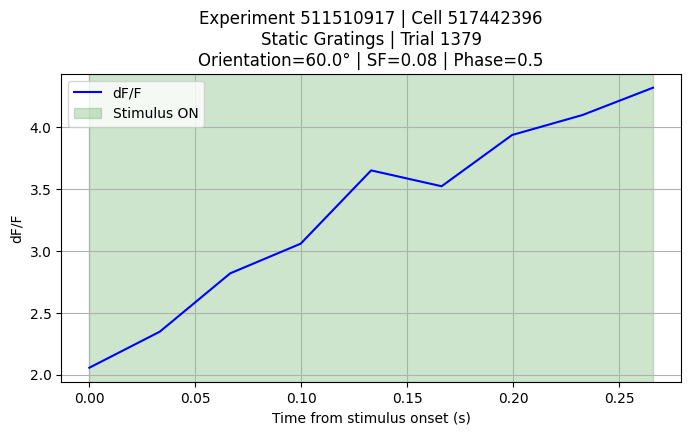

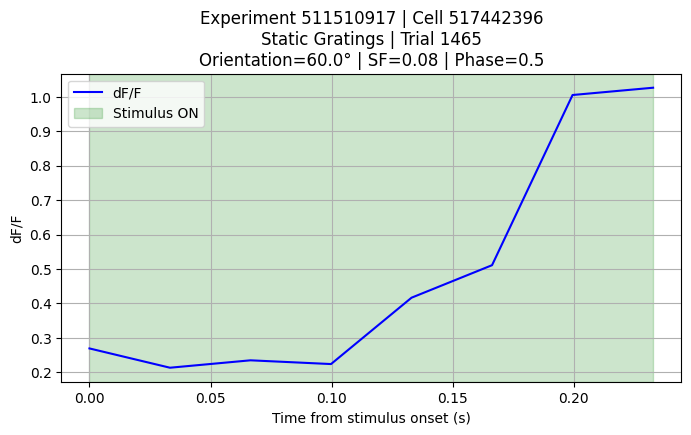

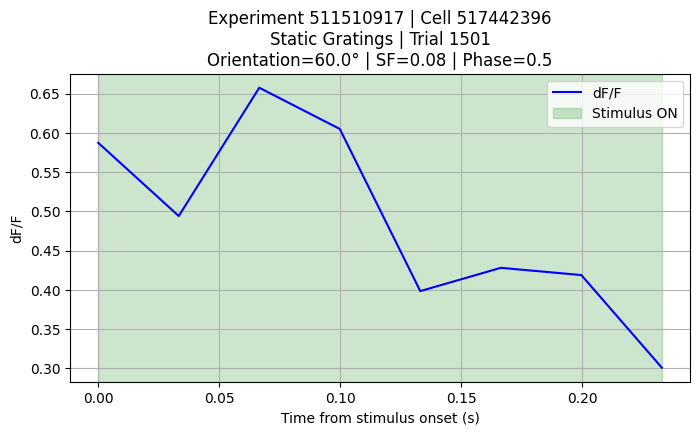

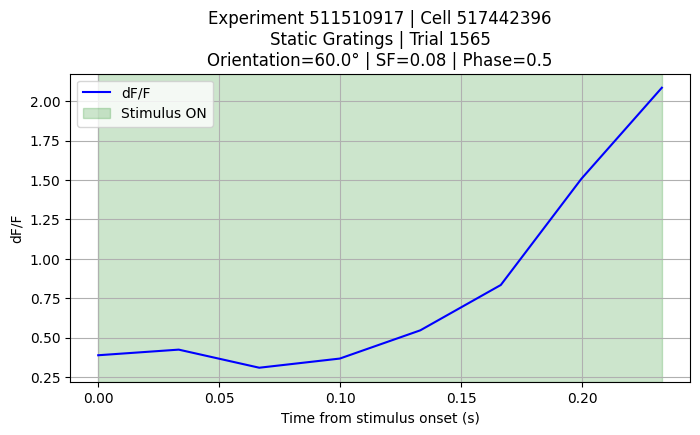

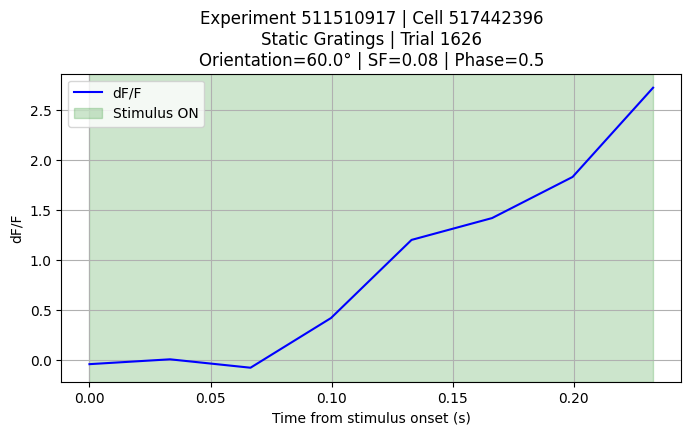

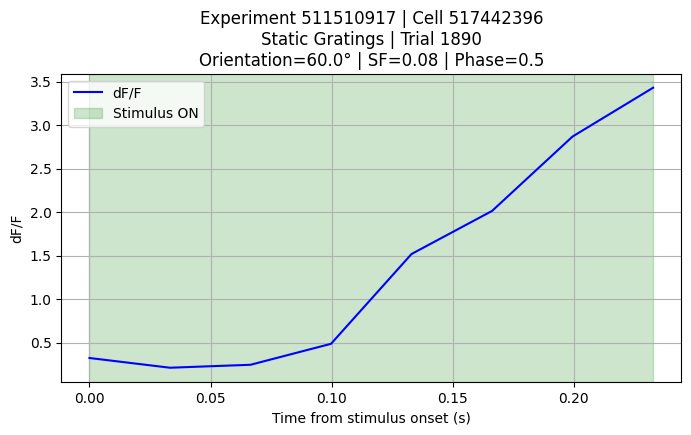

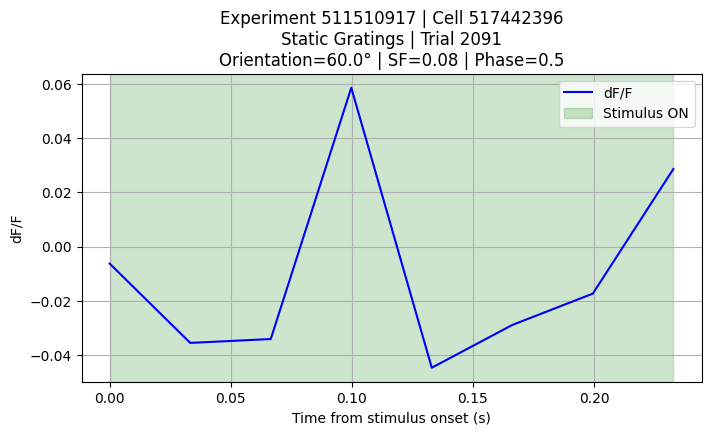

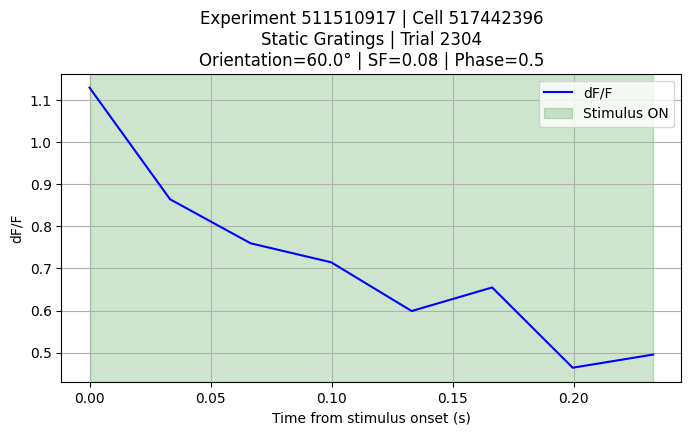

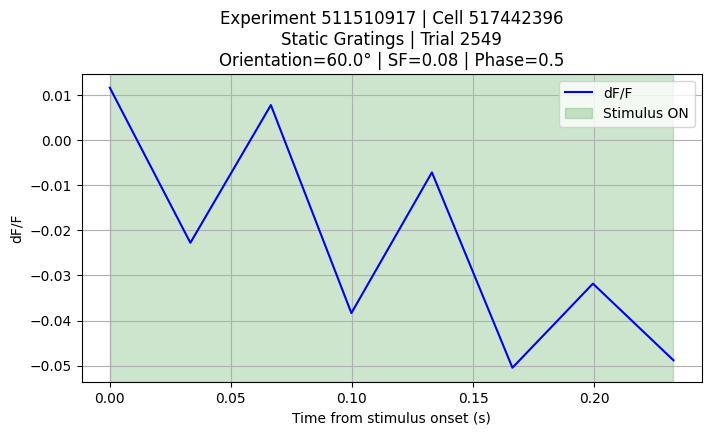

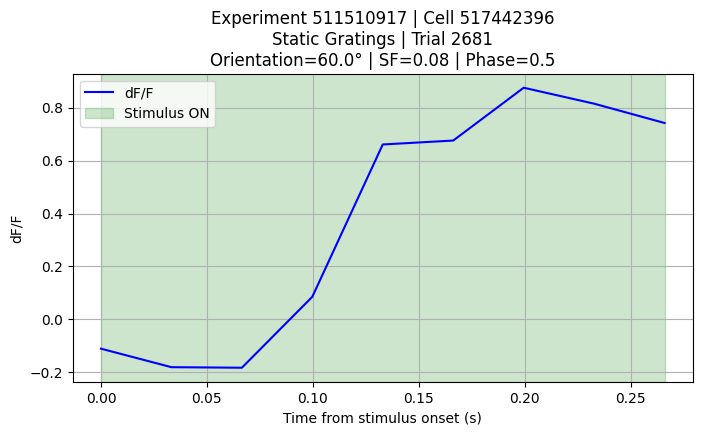

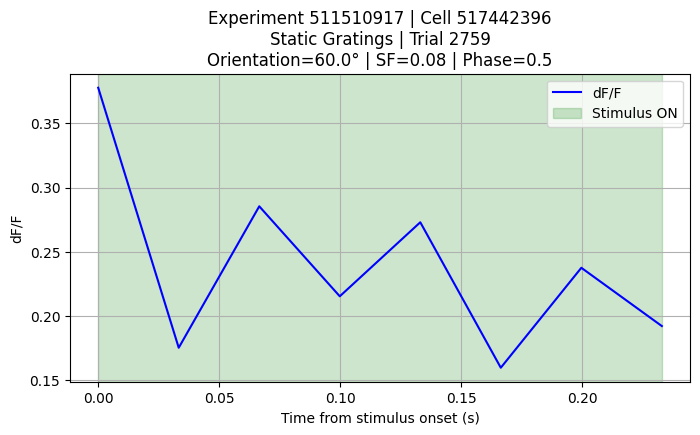

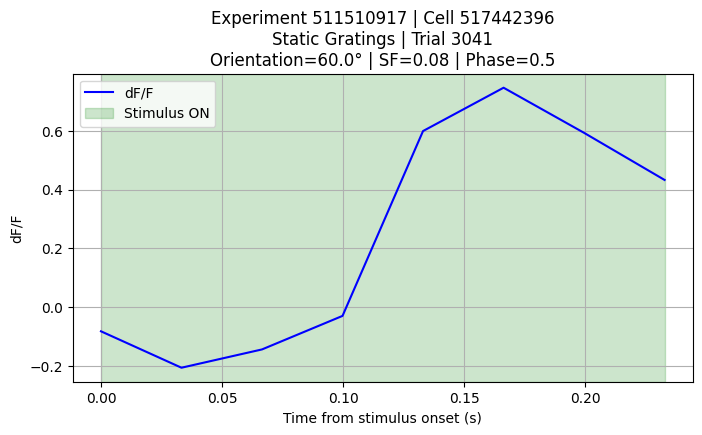

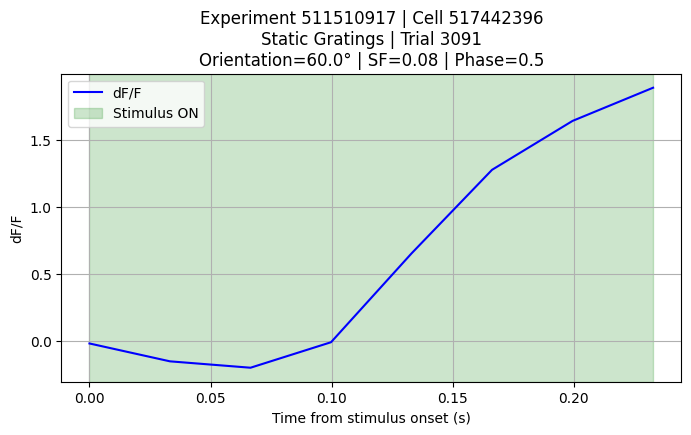

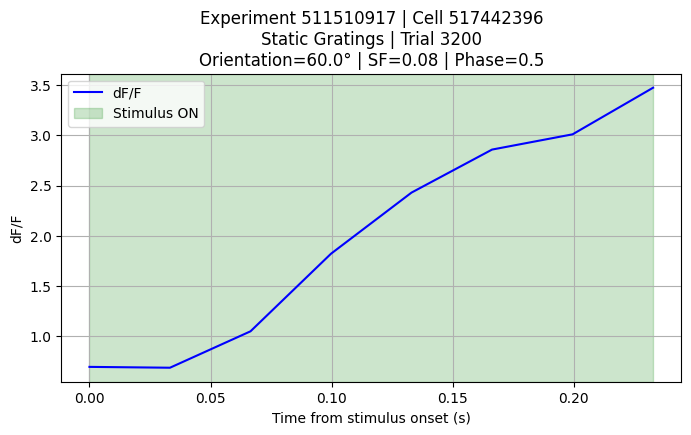

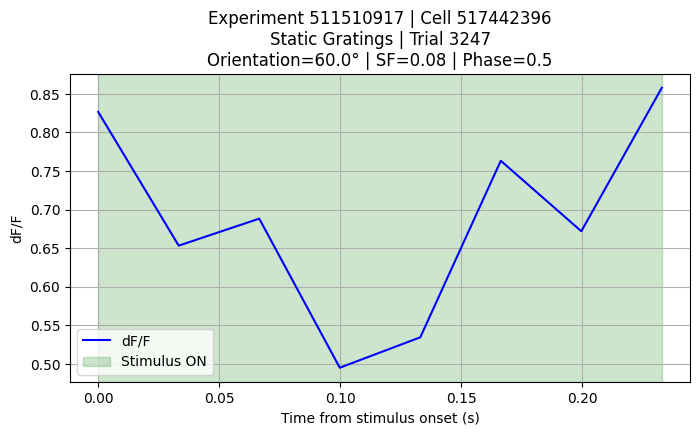

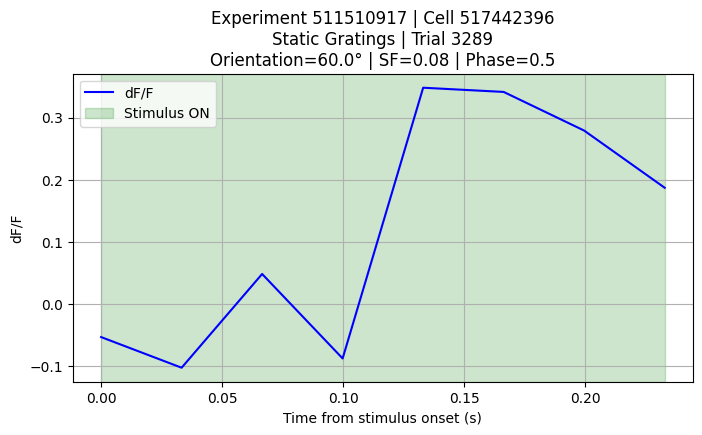

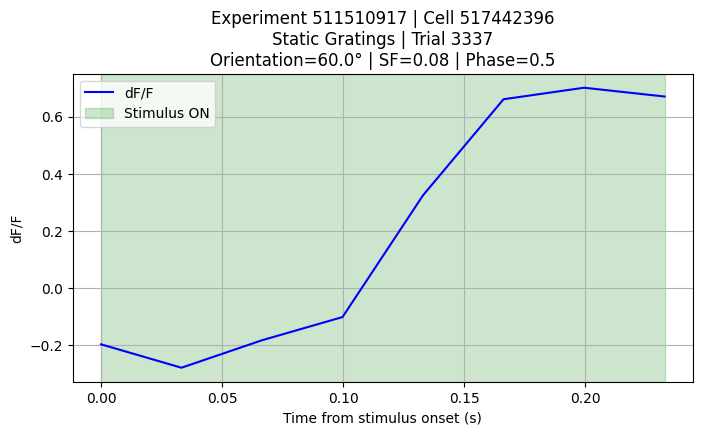

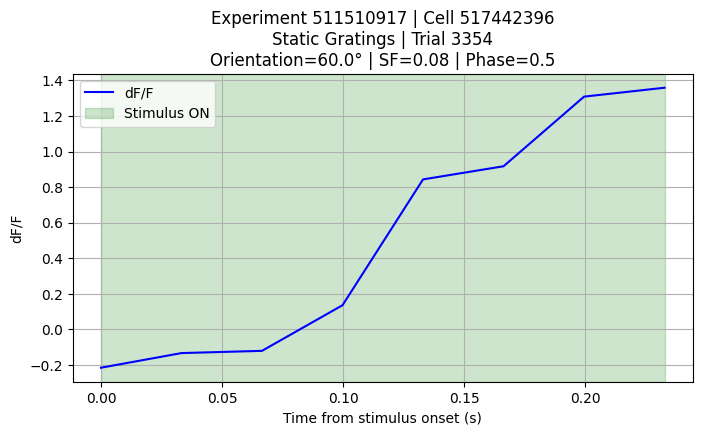

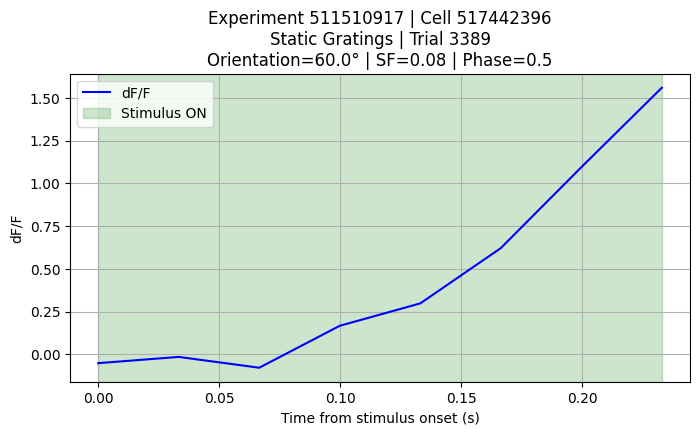

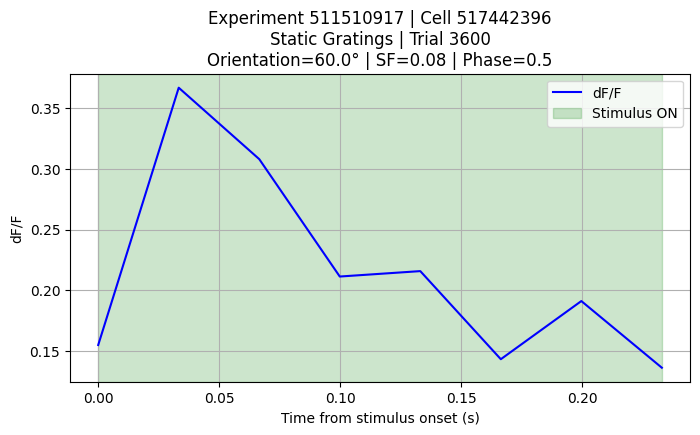

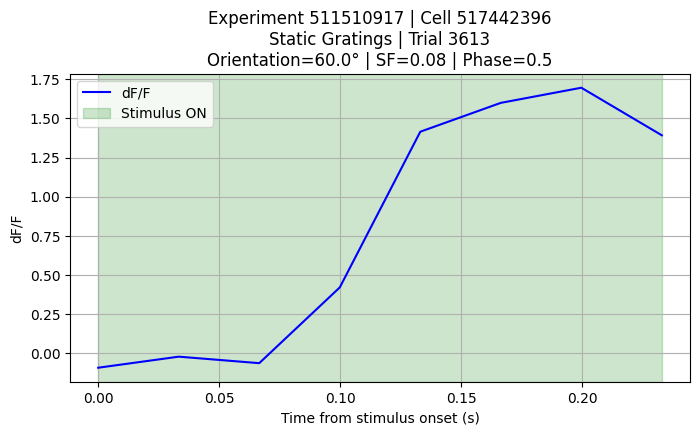

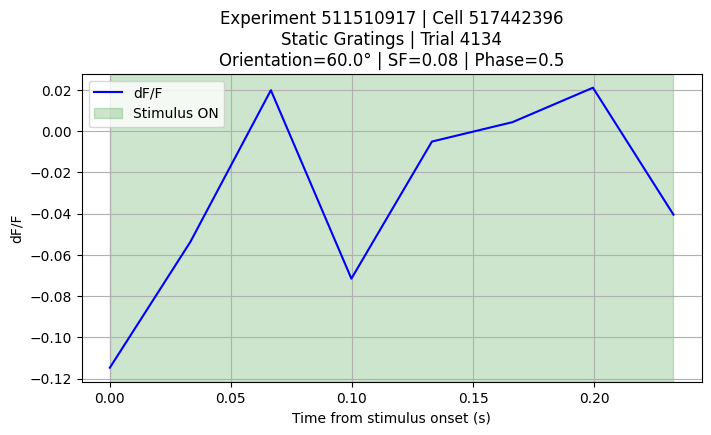

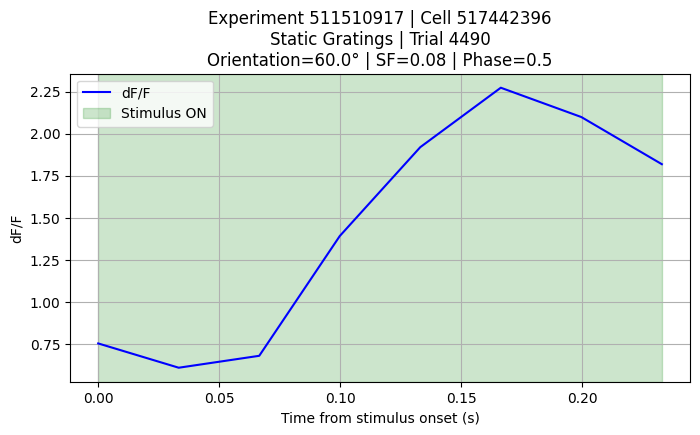

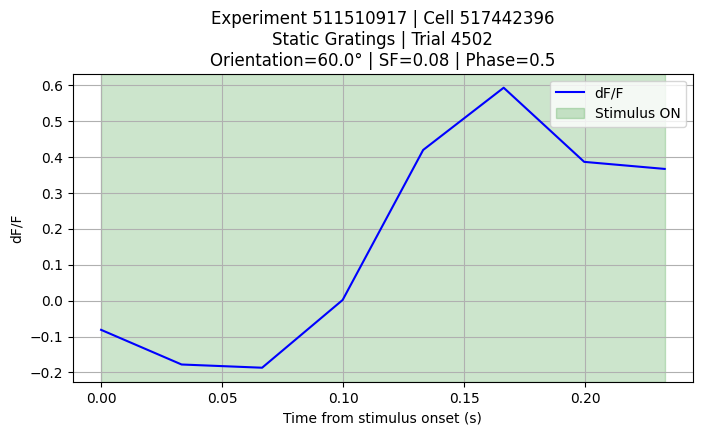

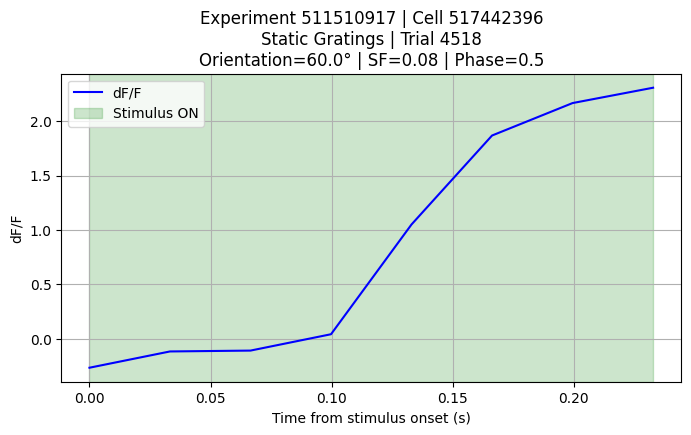

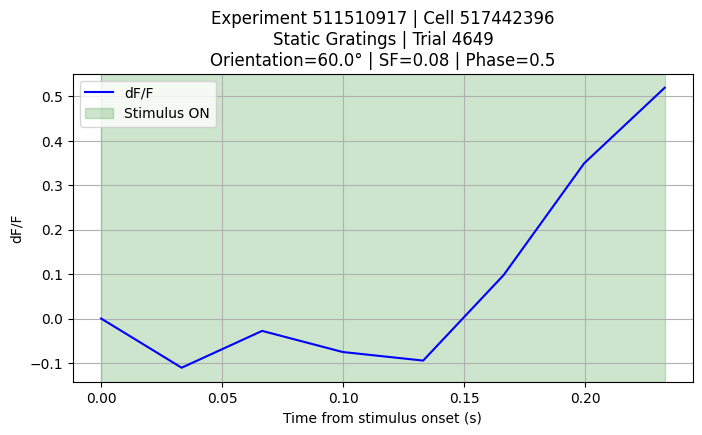

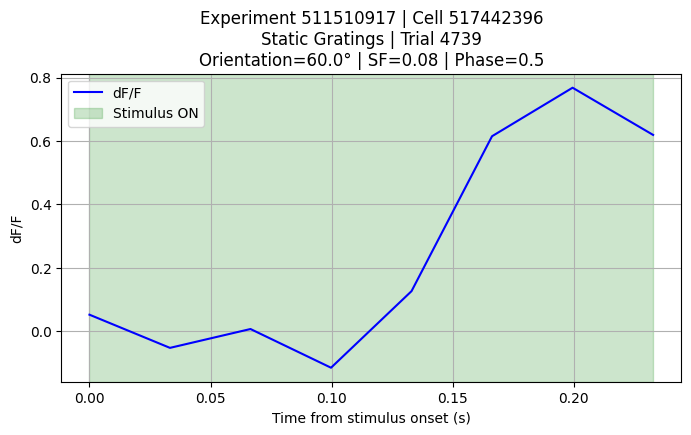

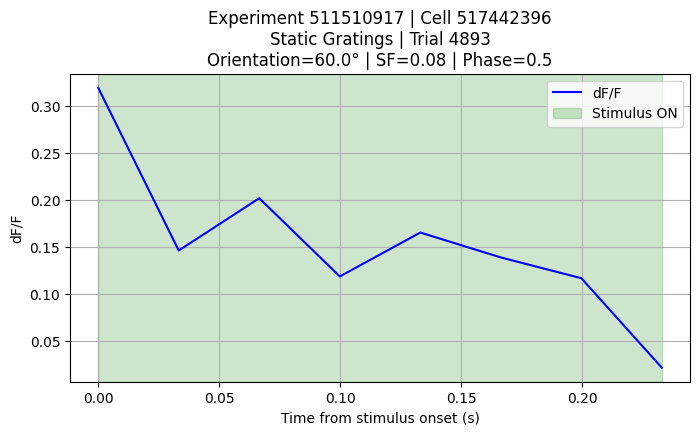

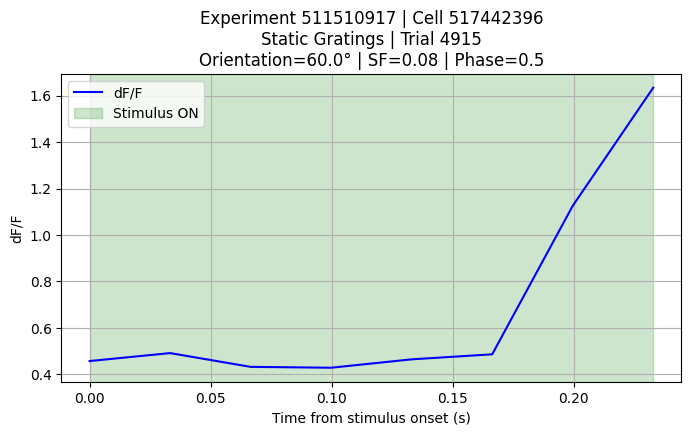

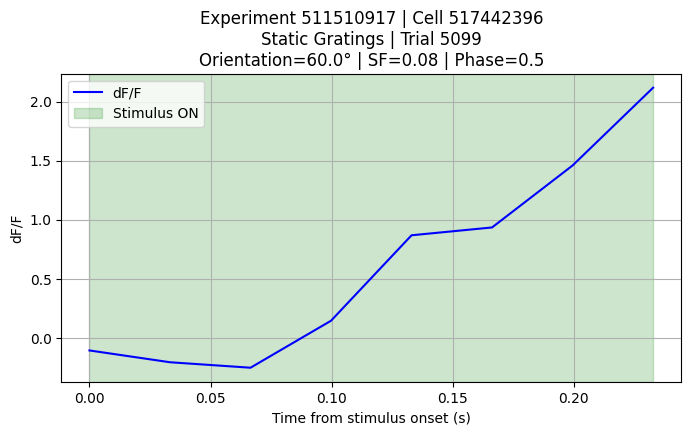

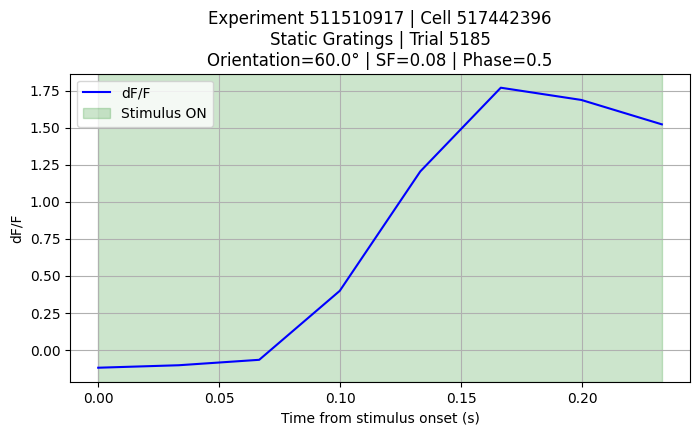

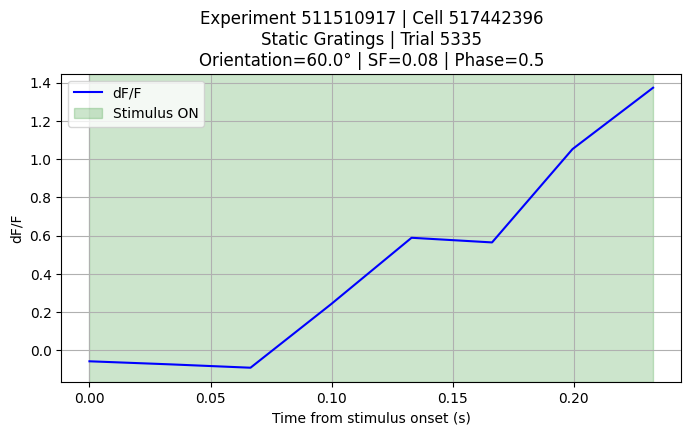

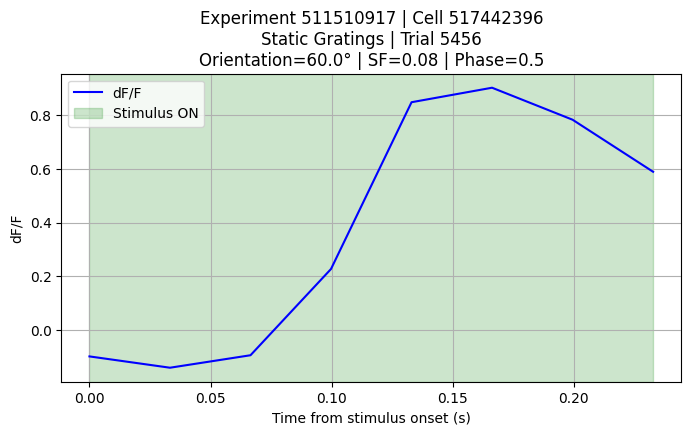

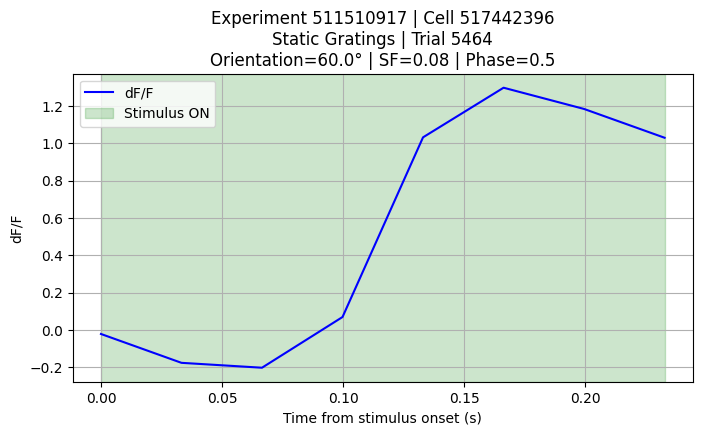

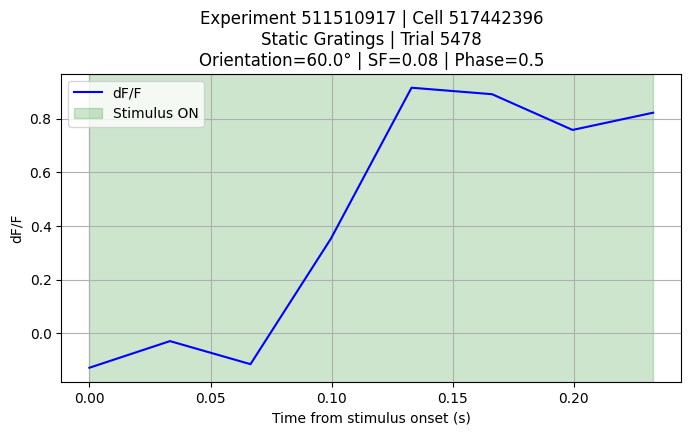

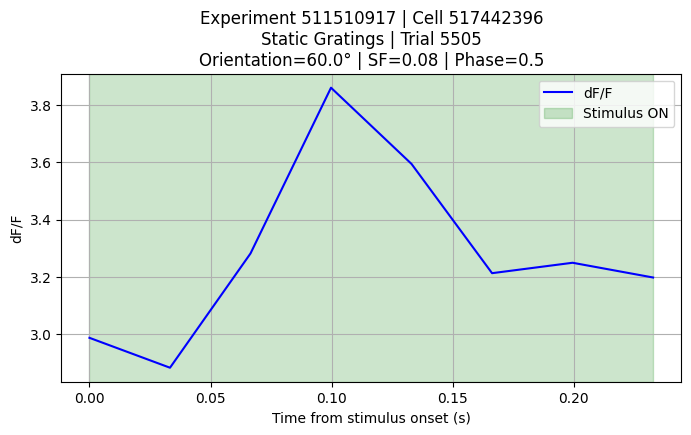

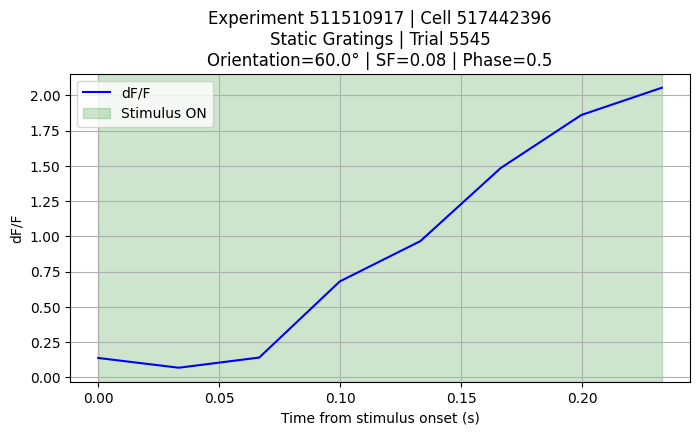

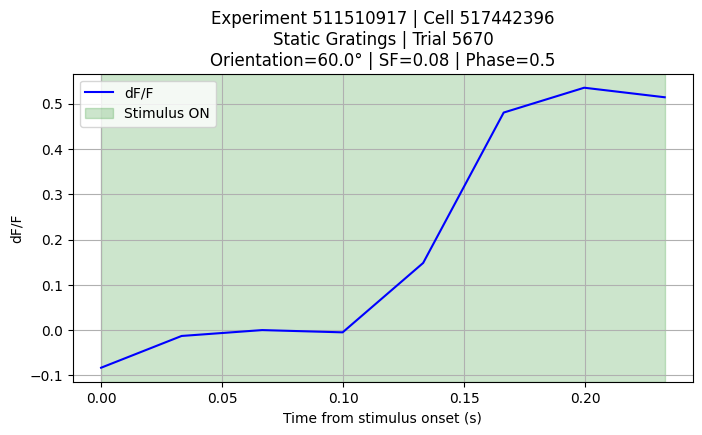

In [ ]:

#----------------------------
# Plot each trial separately
# --------------------------
for i, trial in subset.iterrows():
    stim_start_time = times[int(trial["start"])]
    stim_end_time   = times[int(trial["end"])]

    mask = (times >= stim_start_time) & (times <= stim_end_time)

    trial_time = times[mask] - stim_start_time   # reset to 0 at stimulus onset
    trial_trace = trace[mask]

    plt.figure(figsize=(8,4))
    plt.plot(trial_time, trial_trace, color="blue", label="dF/F")
    plt.axvspan(0, stim_end_time - stim_start_time, color="green", alpha=0.2, label="Stimulus ON")

    plt.xlabel("Time from stimulus onset (s)")
    plt.ylabel("dF/F")
    plt.title(f"Experiment {container_id} | Cell {cell_id}\n"
              f"Static Gratings | Trial {i}\n"
              f"Orientation={ori_choice}° | SF={sf_choice} | Phase={phase_choice}")
    plt.legend()
    plt.grid(True)
    plt.show()

Create a heatmap of all the trials, activity will be on the verical axis and time on the horizontal axis.

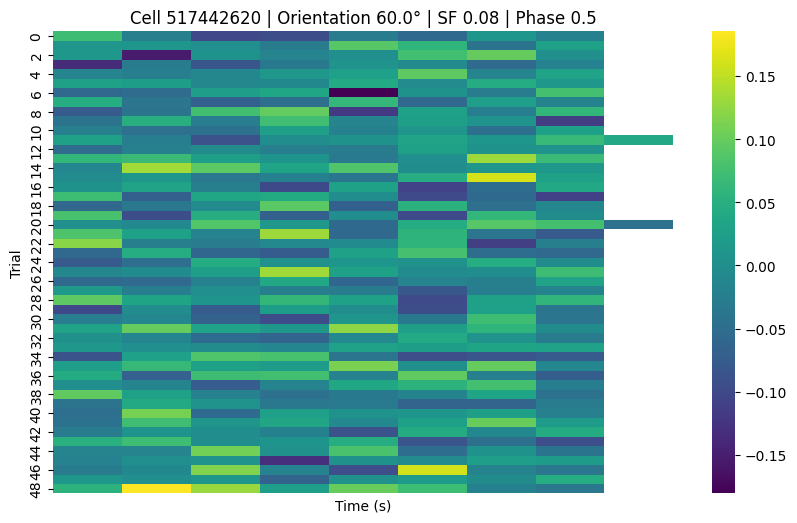

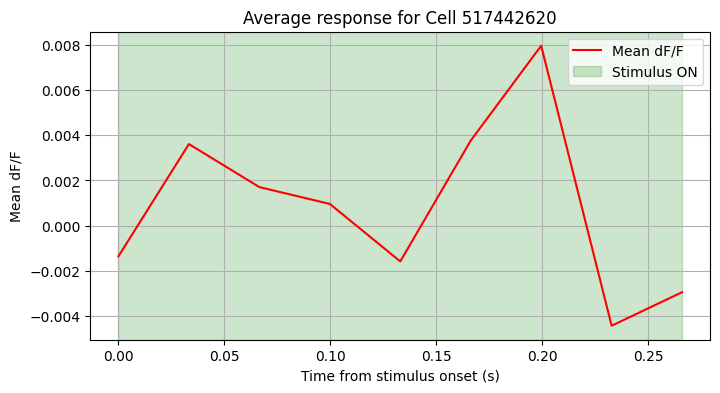

In [ ]:
# -----------------------------
# Build trial x time matrix with padding
# -----------------------------
all_trials = []

stim_durations = []  # store duration of each trial in frames

for i, trial in subset.iterrows():
    stim_start_time = times[int(trial["start"])]
    stim_end_time   = times[int(trial["end"])]
    mask = (times >= stim_start_time) & (times <= stim_end_time)

    trial_trace = trace[mask]
    all_trials.append(trial_trace)

    stim_durations.append(len(trial_trace))

# Pad trials to the max length
max_len = max([len(trial) for trial in all_trials])
trial_matrix = np.array([np.pad(trial, (0, max_len-len(trial)), constant_values=np.nan)
                         for trial in all_trials])

# Compute mean response ignoring NaNs
mean_response = np.nanmean(trial_matrix, axis=0)

# Time vector relative to stimulus onset
time_vector = np.arange(max_len) * np.mean(np.diff(times))  # assuming constant frame rate

# Plot the trial matrix as a heatmap
plt.figure(figsize=(10,6))
sns.heatmap(trial_matrix, cmap="viridis", cbar=True, xticklabels=False)
plt.xlabel("Time (s)")
plt.ylabel("Trial")
plt.title(f"Cell {cell_id} | Orientation {ori_choice}° | SF {sf_choice} | Phase {phase_choice}")
plt.show()

# Plot the average response with green shaded stimulus window
plt.figure(figsize=(8,4))
plt.plot(time_vector, mean_response, color="red", label="Mean dF/F")

# Add green shaded area for stimulus onset
stim_len = int(np.mean(stim_durations))  # approximate duration in frames
stim_time = stim_len * np.mean(np.diff(times))
plt.axvspan(0, stim_time, color="green", alpha=0.2, label="Stimulus ON")

plt.xlabel("Time from stimulus onset (s)")
plt.ylabel("Mean dF/F")
plt.title(f"Average response for Cell {cell_id}")
plt.legend()
plt.grid(True)
plt.show()


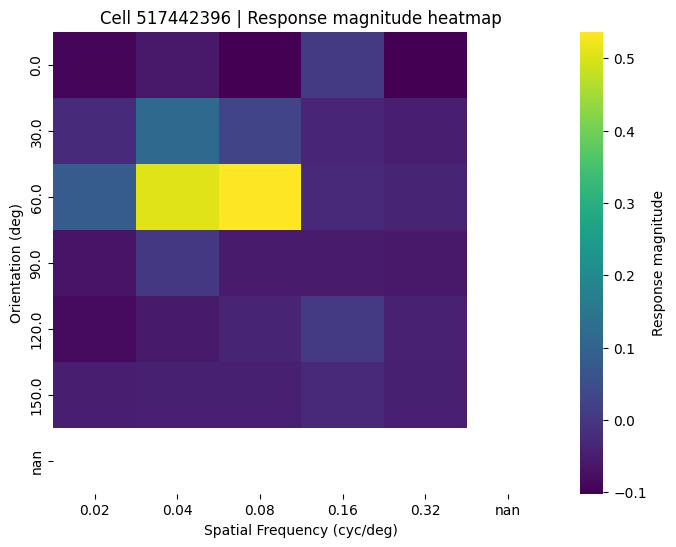

In [ ]:
# -----------------------------
# Step: Response magnitude heatmap for all orientations x spatial frequencies
# -----------------------------

# Get all unique orientations and spatial frequencies
orientations = np.sort(stim_table["orientation"].unique())
sfs = np.sort(stim_table["spatial_frequency"].unique())

# Initialize matrix: rows = orientations, cols = spatial frequencies
response_matrix = np.zeros((len(orientations), len(sfs)))

# Loop over orientation and SF
for i, ori in enumerate(orientations):
    for j, sf in enumerate(sfs):
        # Filter trials for this stimulus combination
        subset_stim = stim_table[
            (stim_table["orientation"] == ori) &
            (stim_table["spatial_frequency"] == sf)
        ]

        if len(subset_stim) == 0:
            response_matrix[i, j] = np.nan  # no trials
            continue

        trial_responses = []
        for _, trial in subset_stim.iterrows():
            stim_start_time = times[int(trial["start"])]
            stim_end_time   = times[int(trial["end"])]
            mask = (times >= stim_start_time) & (times <= stim_end_time)
            trial_trace = trace[mask]

            # Baseline: use 1s before stimulus onset if available
            baseline_mask = (times >= stim_start_time - 1) & (times < stim_start_time)
            baseline = np.mean(trace[baseline_mask]) if np.any(baseline_mask) else 0

            # Response magnitude = mean dF/F during stimulus - baseline
            response_mag = np.mean(trial_trace) - baseline
            trial_responses.append(response_mag)

        # Average across trials for this stimulus
        response_matrix[i, j] = np.mean(trial_responses)

# -----------------------------
# Plot the response magnitude heatmap
# -----------------------------
plt.figure(figsize=(8,6))
sns.heatmap(response_matrix, cmap="viridis", xticklabels=np.round(sfs,3),
            yticklabels=np.round(orientations,1), cbar_kws={'label': 'Response magnitude'})
plt.xlabel("Spatial Frequency (cyc/deg)")
plt.ylabel("Orientation (deg)")
plt.title(f"Cell {cell_id} | Response magnitude heatmap")
plt.show()


Sanity check for Cell 51442396 in experiment 511510917. Sanity check worked out since highest response magnitude was as expected.
- Ask Shin about confrences

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# ------------------------------------------------------
# Assume you already have:
# - boc, dataset
# - stim_table for static gratings
# - cell_ids list
# ------------------------------------------------------

# Define the conditions we want to evaluate
orientations = sorted(stim_table["orientation"].dropna().unique())
spatial_freqs = sorted(stim_table["spatial_frequency"].dropna().unique())

# --- Sort neurons by brain area (metadata) ---
cell_metadata = pd.DataFrame(boc.get_cell_specimens())
cell_metadata = cell_metadata[cell_metadata["cell_specimen_id"].isin(cell_ids)]
cell_metadata = cell_metadata.sort_values(["targeted_structure", "cell_specimen_id"])
sorted_cell_ids = cell_metadata["cell_specimen_id"].tolist()

# Initialize response cube: neurons × orientations × spatial frequencies
response_cube = np.zeros((len(sorted_cell_ids), len(orientations), len(spatial_freqs)))

# ------------------------------------------------------
# Build response cube
# ------------------------------------------------------
for n_idx, cell_id in enumerate(sorted_cell_ids):
    _, dff_traces = dataset.get_dff_traces([cell_id])
    trace = dff_traces[0]
    times = dataset.get_fluorescence_timestamps()

    for i, ori in enumerate(orientations):
        for j, sf in enumerate(spatial_freqs):
            subset = stim_table[
                (stim_table["orientation"] == ori) &
                (stim_table["spatial_frequency"] == sf)
            ]
            if subset.empty:
                response_cube[n_idx, i, j] = np.nan
                continue

            trial_responses = []
            for _, trial in subset.iterrows():
                stim_start = int(trial["start"])
                stim_end   = int(trial["end"])
                trial_trace = trace[stim_start:stim_end]
                trial_responses.append(np.mean(trial_trace))

            response_cube[n_idx, i, j] = np.nanmean(trial_responses)

# ------------------------------------------------------
# 3D Plot: Orientation × Spatial Frequency × Neuron
# ------------------------------------------------------
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

# Flatten cube for scatter
X, Y, Z = np.meshgrid(np.arange(len(orientations)),
                      np.arange(len(spatial_freqs)),
                      np.arange(len(sorted_cell_ids)))
X = X.flatten()
Y = Y.flatten()
Z = Z.flatten()
C = response_cube.flatten()

# Scatter plot in 3D
sc = ax.scatter(X, Y, Z, c=C, cmap="viridis", marker="o")

# Axes labels
ax.set_xlabel("Orientation index")
ax.set_ylabel("Spatial frequency index")
ax.set_zlabel("Neuron (sorted by brain area)")

# Axis ticks
ax.set_xticks(np.arange(len(orientations)))
ax.set_xticklabels([f"{o:.0f}°" for o in orientations])
ax.set_yticks(np.arange(len(spatial_freqs)))
ax.set_yticklabels([f"{sf:.2f}" for sf in spatial_freqs])

plt.title("3D Response Cube: Orientation × SF × Neuron")
fig.colorbar(sc, ax=ax, shrink=0.5, label="Mean dF/F response")
plt.show()


NameError: name 'stim_table' is not defined

In [ ]:
dir(dataset)

['FILE_METADATA_MAPPING',
 'MOTION_CORRECTION_DATASETS',
 'PIPELINE_DATASET',
 'STIMULUS_TABLE_TYPES',
 'SUPPORTED_PIPELINE_VERSION',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_get_master_stimulus_table',
 '_stimulus_search',
 'get_cell_specimen_ids',
 'get_cell_specimen_indices',
 'get_corrected_fluorescence_traces',
 'get_demixed_traces',
 'get_dff_traces',
 'get_fluorescence_timestamps',
 'get_fluorescence_traces',
 'get_locally_sparse_noise_stimulus_template',
 'get_max_projection',
 'get_metadata',
 'get_motion_correction',
 'get_neuropil_r',
 'get_neuropil_traces',
 'get_pupil_location',
 'get_pupil_size',
 'get_roi_ids',
 'get_roi_mask',
